# Univariate Process Kalman Filtering Example

Below, we will present our implementation of example given on pages 11-15 of  [An
Introduction to the Kalman
Filter](http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html) by Greg
Welch and Gary Bishop. The notebook is largely inspired by Andrew Straw's [SciPy implementation](http://scipy-cookbook.readthedocs.io/items/KalmanFiltering.html). This simple example aims to demonstrate key functionality of filtering in Thalesians TSA library. 

In [1]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thalesians.tsa.distrs import NormalDistr as N
import thalesians.tsa.filtering as filtering
import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [4]:
rnd.randomstate(np.random.RandomState(seed=42), force=True)

In [5]:
#Instantiate variables 
n = 100 #number of itrations
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
z = np.random.normal(x,0.1,size=n) # observations (normal about x, sigma=0.1)
posteriors = np.zeros(n) # a posteri estimate of x
P = np.zeros(n)         # a posteri error estimate
priors = np.zeros(n) # a priori estimate of x
Pminus=np.zeros(n)    # a priori error estimate
P[0] = 1.0

Q = 1e-5     #process variance
R = 0.1**2   #estimate of measurement variance (change to see the effect)

W = proc.WienerProcess(mean=0, vol = Q) #Instantiate the Process

#Insantiate Filter
kf = filtering.KalmanFilter(time=0, statedistr=N(0.,1.), process=W)
observable = kf.createobservable(filtering.KalmanFilterObsModel.create(1.),W)


for k in range(0, n):
    prior = observable.predict(k)
    P[k] = prior.distr.cov[0][0]
    obs = observable.observe(k, N(z[k],R))
    posterior = observable.predict(k)
    posteriors[k] = posterior.distr.mean[0][0]

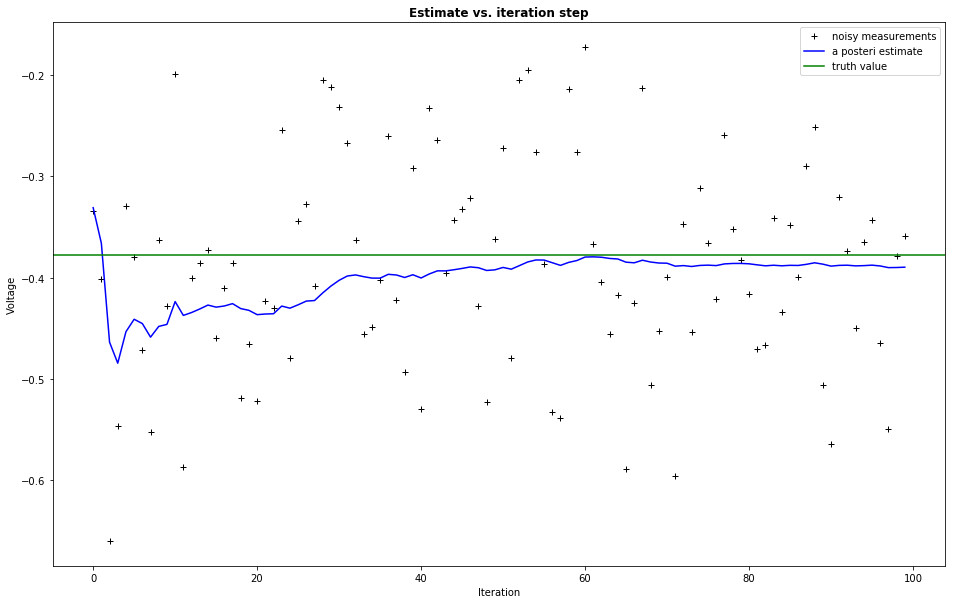

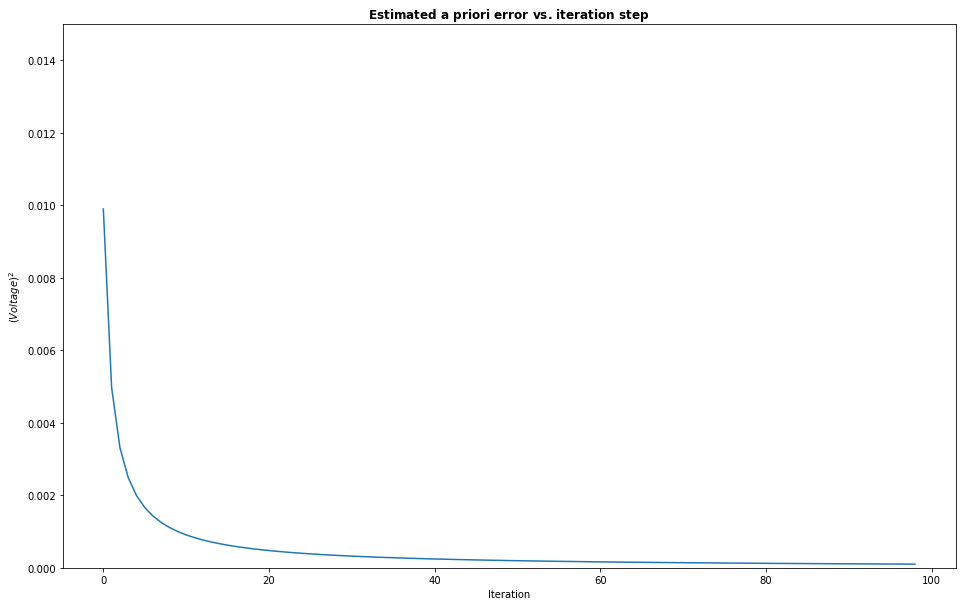

In [6]:
plt.figure()
plt.plot(z,'k+',label='noisy measurements')
plt.plot(posteriors,'b-',label='a posteri estimate')
plt.axhline(x,color='g',label='truth value')
plt.legend()
plt.title('Estimate vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('Voltage')

plt.figure()
plt.plot(P[1:],label='a priori error estimate') #itrate from valid step to match posterior error estiamtes
plt.title('Estimated $\it{\mathbf{a \ priori}}$ error vs. iteration step', fontweight='bold')
plt.xlabel('Iteration')
plt.ylabel('$(Voltage)^2$')
plt.ylim([0, 0.015])
plt.show()

